In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline
path= 'C:\\Users\\asus\\Downloads\\train.csv'
path1= 'C:\\Users\\asus\\Downloads\\test.csv'
df= pd.read_csv(path)
df_test = pd.read_csv(path1)

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
df[['Survived', 'Pclass']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived')


,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


In [3]:

df[['Parch', 'Survived']].groupby(['Parch'], as_index='False').mean().sort_values(by='Survived')

,Survived
Parch,
4,0.000000
6,0.000000
5,0.200000
0,0.343658
2,0.500000
1,0.550847
3,0.600000


In [4]:
df[['Sex','Pclass', 'Survived']].groupby(['Sex','Pclass'], as_index='False').mean().sort_values(by='Survived')


Survived
Sex    Pclass          
male   3       0.135447
       2       0.157407
       1       0.368852
female 3       0.500000
       2       0.921053
       1       0.968085

In [5]:
df[['SibSp', 'Survived']].groupby(['SibSp'], as_index='False').mean().sort_values(by='Survived')


,Survived
SibSp,
5,0.000000
8,0.000000
4,0.166667
3,0.250000
0,0.345395
2,0.464286
1,0.535885


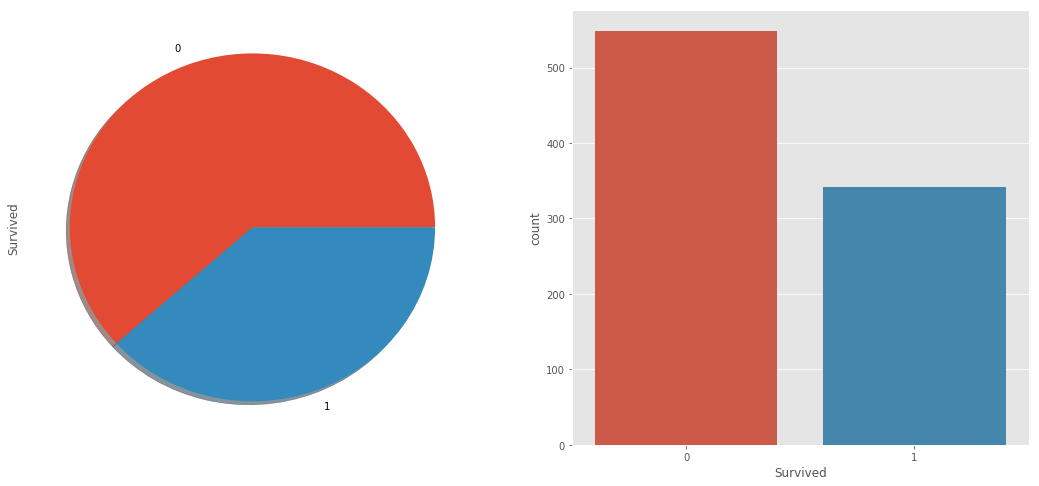

In [6]:
f,ax= plt.subplots(1,2, figsize=(18,8))
df['Survived'].value_counts().plot.pie(shadow=True, ax=ax[0])
sns.countplot('Survived',ax=ax[1], data=df)
plt.show()

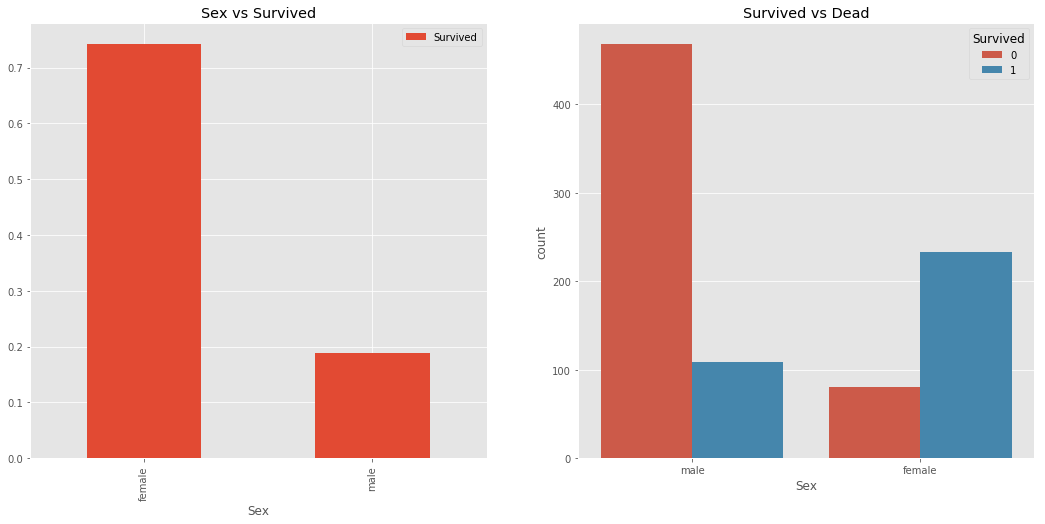

In [7]:
f,ax = plt.subplots(1,2, figsize=(18,8))
df[['Survived', 'Sex']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Sex vs Survived')
sns.countplot('Sex', hue='Survived', ax=ax[1], data=df)
ax[1].set_title('Survived vs Dead')
plt.show()

In [8]:
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [9]:
pd.crosstab(df.Pclass,df.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


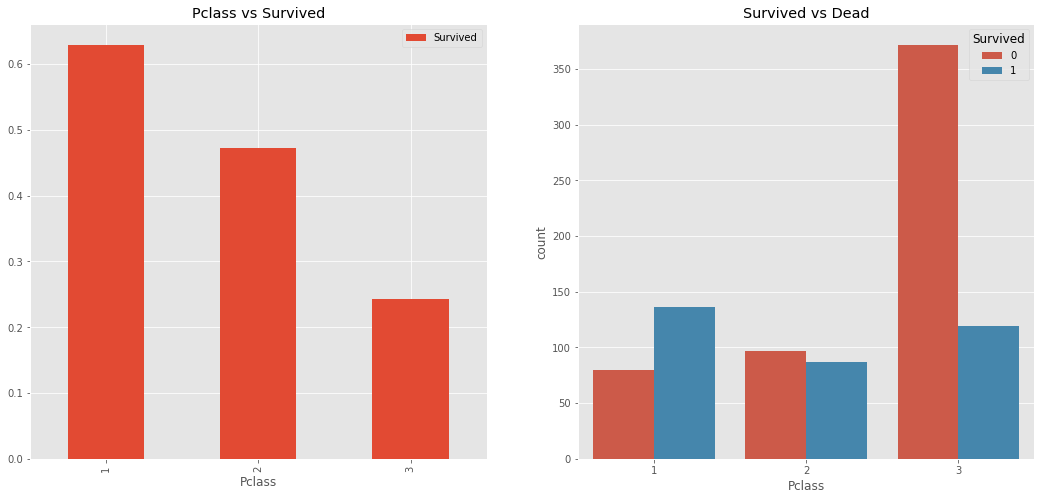

In [10]:
f,ax = plt.subplots(1,2, figsize=(18,8))
df[['Survived', 'Pclass']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Pclass vs Survived')
sns.countplot('Pclass', hue='Survived', ax=ax[1], data=df)
ax[1].set_title('Survived vs Dead')
plt.show()

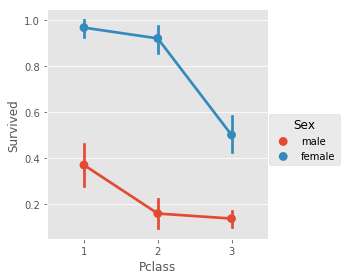

In [11]:
sns.factorplot('Pclass','Survived', hue='Sex', data=df)
plt.show()

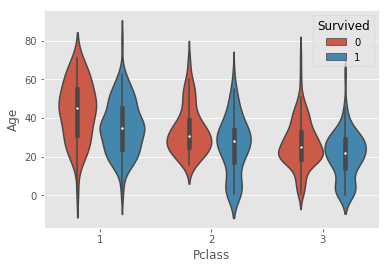

In [12]:
sns.violinplot('Pclass', 'Age', hue='Survived', data=df)
plt.show()

In [13]:
df['Initials']=0
for i in df:
  df['Initials']=df.Name.str.extract('([A-Za-z]+)\.')

df_test['Initials']=0
for i in df_test:
  df_test['Initials']=df_test.Name.str.extract('([A-Za-z]+)\.')

E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
E:\anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  import sys


In [14]:
df['Initials'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

df_test['Initials'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [15]:
df.groupby('Initials')['Age'].mean()


Initials
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [16]:
df.loc[(df.Age.isnull())& (df.Initials=='Mr'), 'Age']=33
df.loc[(df.Age.isnull())& (df.Initials=='Master'), 'Age']=5
df.loc[(df.Age.isnull())& (df.Initials=='Miss'), 'Age']=22
df.loc[(df.Age.isnull())& (df.Initials=='Mrs'), 'Age']=36
df.loc[(df.Age.isnull())& (df.Initials=='Other'), 'Age']=46

df_test.loc[(df_test.Age.isnull())& (df_test.Initials=='Mr'), 'Age']=33
df_test.loc[(df_test.Age.isnull())& (df_test.Initials=='Master'), 'Age']=5
df_test.loc[(df_test.Age.isnull())& (df_test.Initials=='Miss'), 'Age']=22
df_test.loc[(df_test.Age.isnull())& (df_test.Initials=='Mrs'), 'Age']=36
df_test.loc[(df_test.Age.isnull())& (df_test.Initials=='Other'), 'Age']=46

In [17]:
df.Age.isnull().any()

False

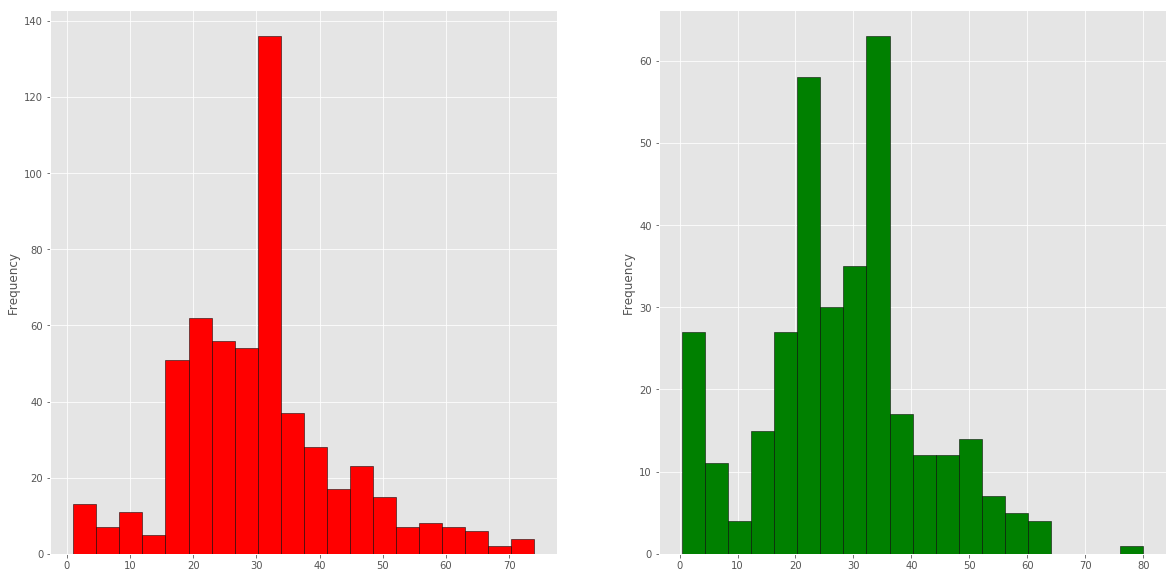

In [18]:
f,ax=plt.subf,ax=plt.subplots(1,2,figsize=(20,10))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
df[df['Survived']==1].Age.plot.hist(ax=ax[1],bins=20, edgecolor='black',color='green')
plt.show()



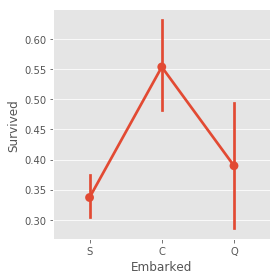

In [19]:
sns.factorplot('Embarked','Survived', data=df)
plt.show()


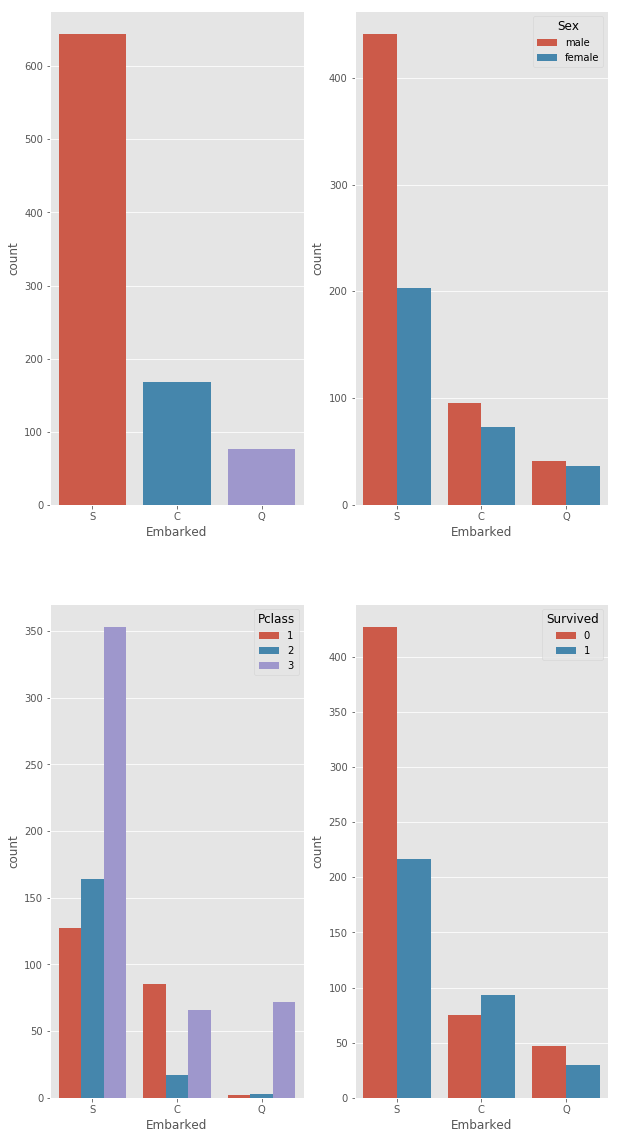

In [20]:
f,ax=plt.subplots(2,2,figsize=(10,20))
sns.countplot('Embarked', data=df, ax=ax[0,0])
sns.countplot('Embarked', hue='Sex', data=df, ax=ax[0,1])
sns.countplot('Embarked', hue='Pclass', data=df, ax=ax[1,0])
sns.countplot('Embarked', hue='Survived', data=df, ax=ax[1,1])
plt.show()

In [21]:
df['Embarked'].fillna('S', inplace=True)
df_test['Embarked'].fillna('S', inplace=True)

In [22]:
pd.crosstab(df.SibSp, df.Survived)


Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


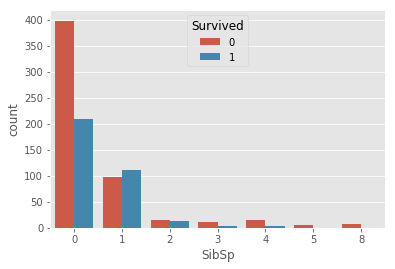

In [23]:
sns.countplot('SibSp', hue='Survived', data=df)
plt.show()

In [24]:
pd.crosstab(df.SibSp, df.Pclass)

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


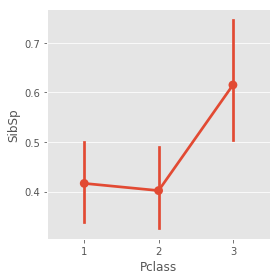

In [25]:
sns.factorplot('Pclass', 'SibSp', data=df)
plt.show()

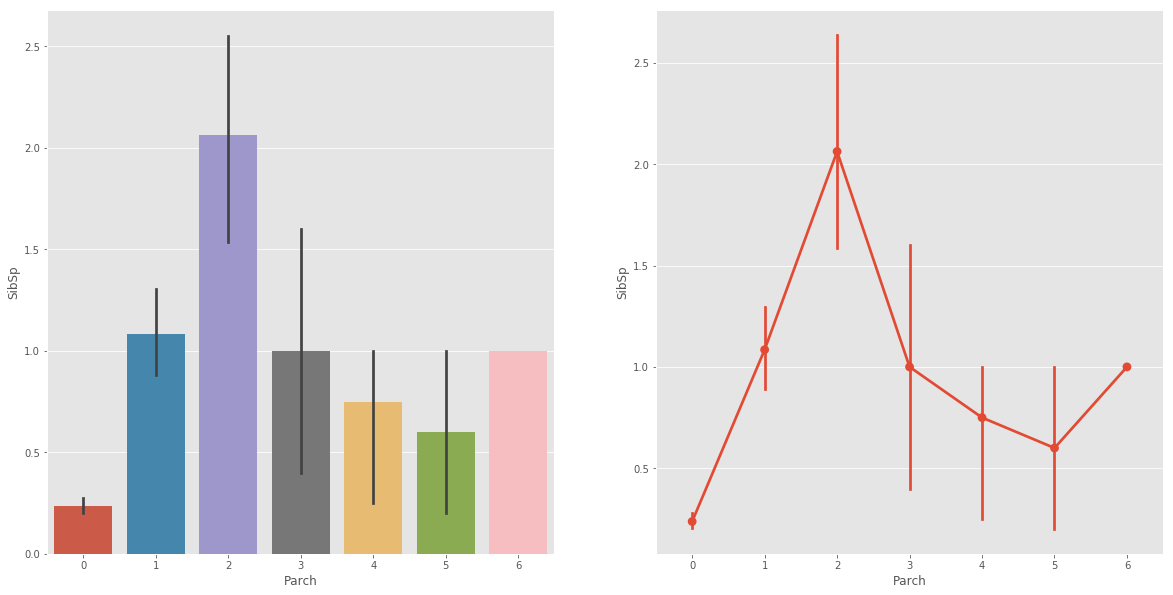

In [26]:
f, ax=plt.subplots(1,2, figsize=(20,10))
sns.barplot('Parch','SibSp', data=df, ax=ax[0])
sns.factorplot('Parch','SibSp', data=df, ax=ax[1])
plt.close(2)
plt.show()

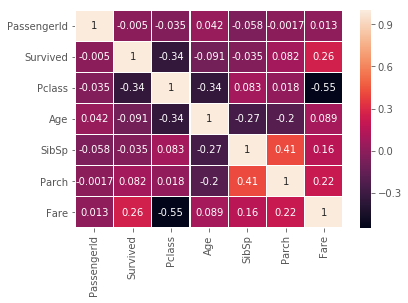

In [27]:
sns.heatmap(df.corr(), annot=True,linewidths=0.1)
plt.show()

In [28]:
df['Age_band']=0
df.loc[df['Age']<=16,'Age_band']=0
df.loc[(df['Age']>16)&(df['Age']<=32),'Age_band']=1
df.loc[(df['Age']>32)&(df['Age']<=48),'Age_band']=2
df.loc[(df['Age']>48)&(df['Age']<=64),'Age_band']=3
df.loc[df['Age']>64,'Age_band']=4
df.head()

df_test['Age_band']=0
df_test.loc[df_test['Age']<=16,'Age_band']=0
df_test.loc[(df_test['Age']>16)&(df_test['Age']<=32),'Age_band']=1
df_test.loc[(df_test['Age']>32)&(df_test['Age']<=48),'Age_band']=2
df_test.loc[(df_test['Age']>48)&(df_test['Age']<=64),'Age_band']=3
df_test.loc[df_test['Age']>64,'Age_band']=4
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials,Age_band
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,3
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,1


In [29]:
df['Family_Size']=0
df['Family_Size']=df['Parch']+df['SibSp']
df['Alone']=0
df.loc[df.Family_Size==0,'Alone']=1
df.head()

df_test['Family_Size']=0
df_test['Family_Size']=df_test['Parch']+df_test['SibSp']
df_test['Alone']=0
df_test.loc[df_test.Family_Size==0,'Alone']=1



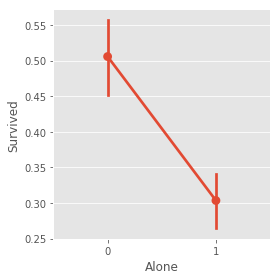

In [30]:
sns.factorplot('Alone','Survived', data=df)
plt.show()

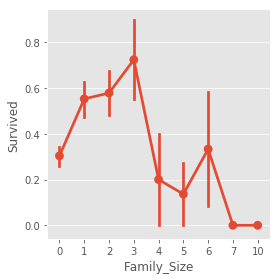

In [31]:
sns.factorplot('Family_Size','Survived', data=df)
plt.show()

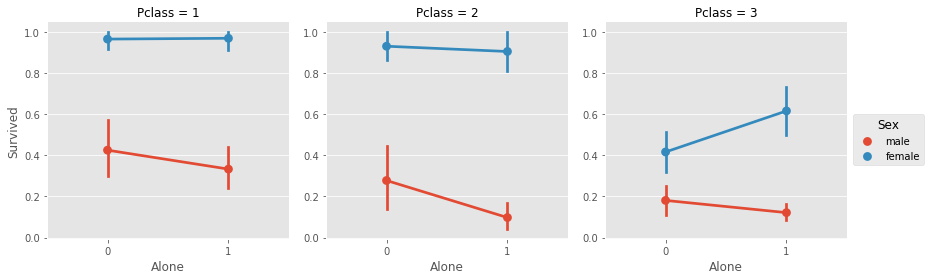

In [32]:
sns.factorplot('Alone','Survived', data=df, hue='Sex', col='Pclass')
plt.show()

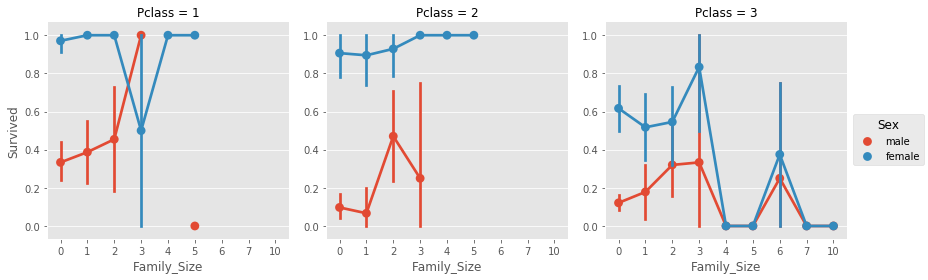

In [33]:
sns.factorplot('Family_Size','Survived', data=df, hue='Sex', col='Pclass')
plt.show()

In [34]:
df['Fare_R']=pd.qcut(df['Fare'],4)


In [35]:
df.groupby('Fare_R')['Survived'].mean()


Fare_R
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [36]:
df['Fare_']=0
df.loc[df['Fare']<=7.91,'Fare_']=0
df.loc[(df['Fare']>7.91)&(df['Fare']<=14.454),'Fare_']=1
df.loc[(df['Fare']>14.454)&(df['Fare']<=31),'Fare_']=2
df.loc[(df['Fare']>31)&(df['Fare']<=513),'Fare_']=3
df.head()

df_test['Fare_']=0
df_test.loc[df_test['Fare']<=7.91,'Fare_']=0
df_test.loc[(df_test['Fare']>7.91)&(df_test['Fare']<=14.454),'Fare_']=1
df_test.loc[(df_test['Fare']>14.454)&(df_test['Fare']<=31),'Fare_']=2
df_test.loc[(df_test['Fare']>31)&(df_test['Fare']<=513),'Fare_']=3
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials,Age_band,Family_Size,Alone,Fare_
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,2,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,3,0,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,1,2,0,1


In [37]:
df['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [38]:
df1=pd.read_csv(path)

In [39]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df['Sex']= df1['Sex']
df_test['Sex']= df1['Sex']

In [41]:
df['Sex'].head()


0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [42]:
def a(x):
    if x=='male':
        return 0
    if x=='female':
        return 1

In [43]:
df['SEX']=df['Sex'].apply(a)
df_test['SEX']=df['Sex'].apply(a)

In [44]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials,Age_band,Family_Size,Alone,Fare_R,Fare_,SEX
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]",0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]",3,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]",3,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]",1,0


In [45]:
def b(x):
    if x=='S':
        return 0
    if x=='C':
        return 1
    if x=='Q':
        return 2

In [46]:
df['EMBARKED']= df['Embarked'].apply(b)
df_test['EMBARKED']=df_test['Embarked'].apply(b)

In [47]:
def c(x):
    if x=='Mr':
        return 0
    if x=='Mrs':
        return 1
    if x=='Miss':
        return 2
    if x=='Master':
        return 3
    if x=='Other':
        return 4

In [48]:
df['INITIALS']= df['Initials'].apply(c)
df_test['INITIALS']=df_test['Initials'].apply(c)

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Initials,Age_band,Family_Size,Alone,Fare_R,Fare_,SEX,EMBARKED,INITIALS
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,Mr,1,1,0,"(-0.001, 7.91]",0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,Mrs,2,1,0,"(31.0, 512.329]",3,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,Miss,1,0,1,"(7.91, 14.454]",1,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,Mrs,2,1,0,"(31.0, 512.329]",3,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,Mr,2,0,1,"(7.91, 14.454]",1,0,0,0


In [50]:
df['Embarked']=df1['Embarked']

In [51]:
df['EMBARKED']= df['Embarked'].apply(b)

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Initials,Age_band,Family_Size,Alone,Fare_R,Fare_,SEX,EMBARKED,INITIALS
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,Mr,1,1,0,"(-0.001, 7.91]",0,0,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,Mrs,2,1,0,"(31.0, 512.329]",3,1,1.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,Miss,1,0,1,"(7.91, 14.454]",1,1,0.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,Mrs,2,1,0,"(31.0, 512.329]",3,1,0.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,Mr,2,0,1,"(7.91, 14.454]",1,0,0.0,0


In [53]:
df.drop(['PassengerId', 'Sex', 'Age','Name','Ticket','Fare','Fare_R','Initials'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Sex', 'Age','Name','Ticket','Fare','Initials'], axis=1, inplace=True)


In [54]:
df

,Survived,Pclass,SibSp,Parch,Cabin,Embarked,Age_band,Family_Size,Alone,Fare_,SEX,EMBARKED,INITIALS
0,0,3,1,0,NaN,S,1,1,0,0,0,0.0,0
1,1,1,1,0,C85,C,2,1,0,3,1,1.0,1
2,1,3,0,0,NaN,S,1,0,1,1,1,0.0,2
3,1,1,1,0,C123,S,2,1,0,3,1,0.0,1
4,0,3,0,0,NaN,S,2,0,1,1,0,0.0,0
5,0,3,0,0,NaN,Q,2,0,1,1,0,2.0,0
6,0,1,0,0,E46,S,3,0,1,3,0,0.0,0
7,0,3,3,1,NaN,S,0,4,0,2,0,0.0,3
8,1,3,0,2,NaN,S,1,2,0,1,1,0.0,1
9,1,2,1,0,NaN,C,0,1,0,2,1,1.0,1


In [55]:
df.drop(['Cabin','Embarked'], axis=1, inplace=True)
df_test.drop(['Cabin','Embarked'], axis=1, inplace=True)

In [56]:
df

,Survived,Pclass,SibSp,Parch,Age_band,Family_Size,Alone,Fare_,SEX,EMBARKED,INITIALS
0,0,3,1,0,1,1,0,0,0,0.0,0
1,1,1,1,0,2,1,0,3,1,1.0,1
2,1,3,0,0,1,0,1,1,1,0.0,2
3,1,1,1,0,2,1,0,3,1,0.0,1
4,0,3,0,0,2,0,1,1,0,0.0,0
5,0,3,0,0,2,0,1,1,0,2.0,0
6,0,1,0,0,3,0,1,3,0,0.0,0
7,0,3,3,1,0,4,0,2,0,0.0,3
8,1,3,0,2,1,2,0,1,1,0.0,1
9,1,2,1,0,0,1,0,2,1,1.0,1


In [57]:
df_test

,Pclass,SibSp,Parch,Age_band,Family_Size,Alone,Fare_,SEX,EMBARKED,INITIALS
0,3,0,0,2,0,1,0,0,2,0.0
1,3,1,0,2,1,0,0,1,0,1.0
2,2,0,0,3,0,1,1,1,2,0.0
3,3,0,0,1,0,1,1,1,0,0.0
4,3,1,1,1,2,0,1,0,0,1.0
5,3,0,0,0,0,1,1,0,0,0.0
6,3,0,0,1,0,1,0,0,2,2.0
7,2,1,1,1,2,0,2,0,0,0.0
8,3,0,0,1,0,1,0,1,1,1.0
9,3,2,0,1,2,0,2,1,0,0.0


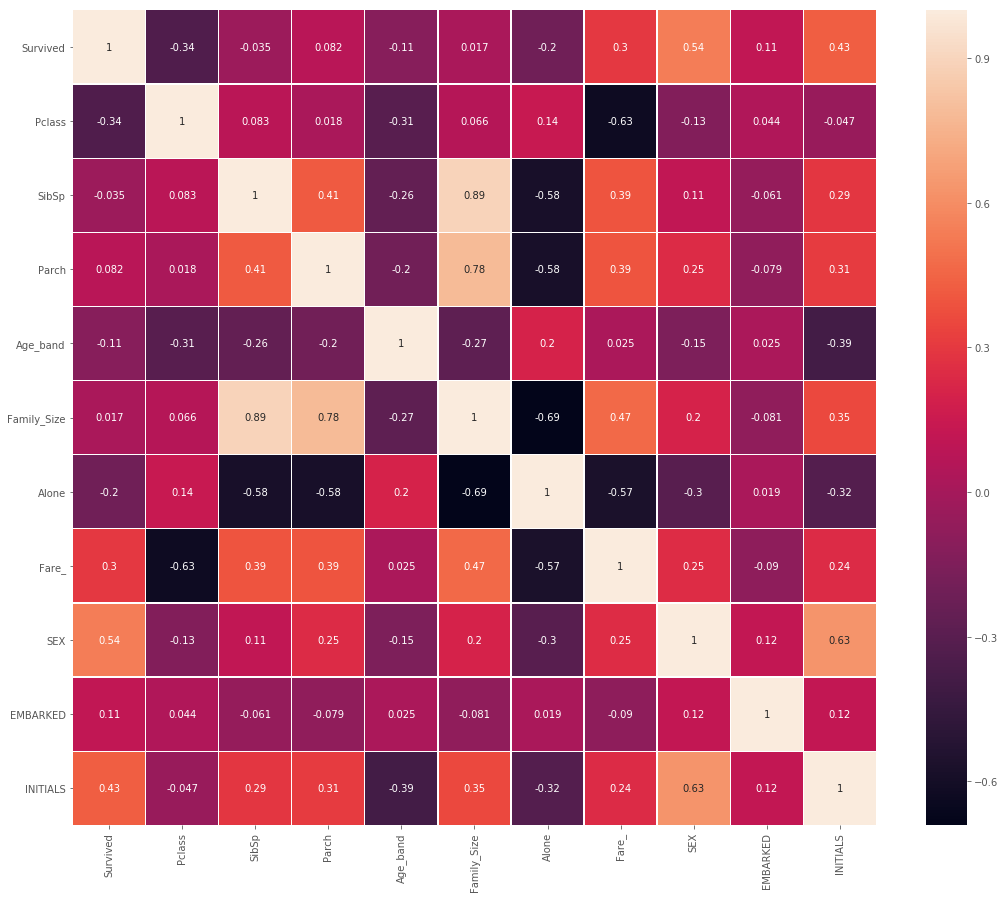

In [58]:
sns.heatmap(df.corr(), annot=True, linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.show()

In [59]:
#Predictive Modelling

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [61]:
df.head(2)

,Survived,Pclass,SibSp,Parch,Age_band,Family_Size,Alone,Fare_,SEX,EMBARKED,INITIALS
0,0,3,1,0,1,1,0,0,0,0.0,0
1,1,1,1,0,2,1,0,3,1,1.0,1


In [62]:
df.isnull().any()

Survived       False
Pclass         False
SibSp          False
Parch          False
Age_band       False
Family_Size    False
Alone          False
Fare_          False
SEX            False
EMBARKED        True
INITIALS       False
dtype: bool

In [63]:
df_test.isnull().any()

Pclass         False
SibSp          False
Parch          False
Age_band       False
Family_Size    False
Alone          False
Fare_          False
SEX            False
EMBARKED       False
INITIALS        True
dtype: bool

In [64]:
df_test = df_test.fillna(method='ffill')

In [65]:
df_test.isnull().any()

Pclass         False
SibSp          False
Parch          False
Age_band       False
Family_Size    False
Alone          False
Fare_          False
SEX            False
EMBARKED       False
INITIALS       False
dtype: bool

In [66]:
df = df.fillna(method='ffill')

In [67]:
df.isnull().any()

Survived       False
Pclass         False
SibSp          False
Parch          False
Age_band       False
Family_Size    False
Alone          False
Fare_          False
SEX            False
EMBARKED       False
INITIALS       False
dtype: bool

In [68]:
X= df[df.columns[1:]]
y= df['Survived']


X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=21, stratify=y)

In [69]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)

In [70]:
knn.score(X_test, y_test)

0.82835820895522383

In [71]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
print(metrics.accuracy_score(y_pred1, y_test))

0.828358208955


In [72]:
model1= GaussianNB()
model1.fit(X_train, y_train)
y_pred2 = model1.predict(X_test)
print(metrics.accuracy_score(y_pred2, y_test))

0.805970149254


In [73]:
model2= RandomForestClassifier(n_estimators=100)
model2.fit(X_train, y_train)
y_pred3 = model2.predict(X_test)
print(metrics.accuracy_score(y_pred3, y_test))

0.813432835821


In [74]:
y_train= df['Survived']
X_train=df.drop("Survived", axis=1)
X_test= df_test.copy()

print(X_test.shape)
print(y_train.shape)
print(X_train.shape)

(418, 10)
(891,)
(891, 10)


In [77]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)

In [78]:
submission = pd.DataFrame({
    
    "Survived": y_pred
})

submission.to_csv('C:\\Users\\asus\\Downloads\\submission1.csv', index=True)